<a href="https://colab.research.google.com/github/ersmythe/MAT421/blob/main/Module_H2ipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 22.4 Numerical Error and Instability
We can assess ODE integration methods through their **accuracy** and **stability**.

Accuracy is how close the integration method gets to the exact solution, which we usually don't know. We use similar notation to derivation methods, which is $O(h^p)$, when h is the step size and p is the order of accuracy.

Stability is also based on the error of an integration method. If the error does not grow while integrating forwards, the method is stable. If the error continually increases, it is unstable. Stability depends on not just the integration method, but also the function being integrated and the step size h.

The example below demonstrates how different models have different stability when solving the same pendulum problem.

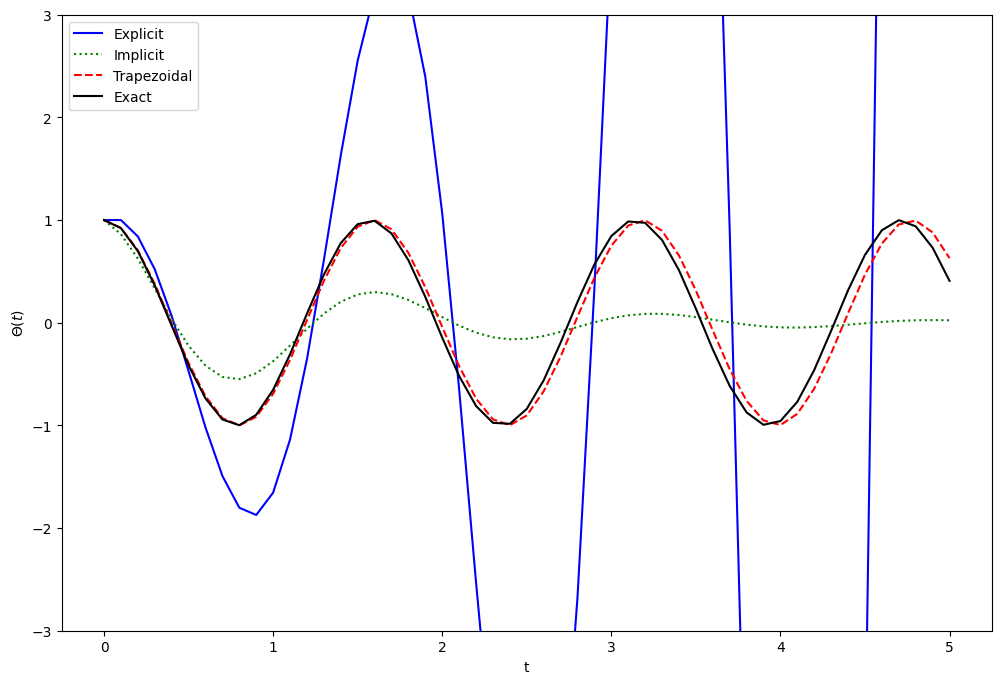

In [1]:
import numpy as np
from numpy.linalg import inv
import matplotlib.pyplot as plt

h = 0.1
t = np.arange(0, 5.1, h)
w = 4
s0 = np.array([[1], [0]])
m_e = np.array([[1, h], [-w**2*h, 1]])
m_i = inv(np.array([[1, -h], [w**2*h, 1]]))
m_t = np.dot(inv(np.array([[1, -h/2], [w**2*h/2,1]])), np.array([[1, h/2], [-w**2*h/2, 1]]))

s_e = np.zeros((len(t), 2))
s_i = np.zeros((len(t), 2))
s_t = np.zeros((len(t), 2))

s_e[0, :] = s0.T
s_i[0, :] = s0.T
s_t[0, :] = s0.T

for i in range(0, len(t)-1):
    s_e[i+1, :] = np.dot(m_e, s_e[i, :])
    s_i[i+1, :] = np.dot(m_i, s_i[i, :])
    s_t[i+1, :] = np.dot(m_t, s_t[i, :])

plt.figure(figsize=(12, 8))
plt.plot(t, s_e[:,0], 'b-')
plt.plot(t, s_i[:,0], 'g:')
plt.plot(t, s_t[:,0], 'r--')
plt.plot(t, np.cos(w*t), 'k')
plt.ylim([-3, 3])
plt.xlabel('t')
plt.ylabel('$\Theta (t)$')
plt.legend(['Explicit', 'Implicit', 'Trapezoidal', 'Exact'])
plt.show()

Note that in the above example, the explicit model is unstable, the implicit model decays exponentially (incorrect), and the trapezoidal model follows the exact solution relatively closely.

# 22.5 Predictor-Corrector and Runge Kutta Methods
For a time and state value, F(t,S(t)) gives the change of the state $\frac {dS(t)} {dt}$. Predictor-corrector methods test the F function at various locations (making predicitons), and then take a weighted average of the results to return the specific state (corrections). These are two separate formulas.

Here are the formulas for the midpoint method:

Predictor: $S(t_j+\frac {h} {2}) = S(t_j) + \frac {h} {2}F(t_j,S(t_j))$

Corrector: $S(t_{j+1})=S(t_j)+hF(t_j+\frac {h} {2}, S(t_j+\frac {h}{2}))$

Runge Kutta methods are widely used. It is able to still use a truncated taylor series (like Euler's methods), but is accurate without computing higher order derivatives. Some common Runge Kutta methods are the second-order and fourth-order ones (denoting the order of accuracy).


# 22.6 Python ODE Solvers
Scipy has build-in functions for initial value problems, one of which is scipy.integrate.solve_ivp(fun, t_span, s0, method = 'RK45', t_eval=None). This solves a problem as such:

$\frac {dS(t)}{dt}=F(t,S(t))$

$S(t0)=S0$

In the syntax, fun is the function F, t_span is the integration interval (t0,tf), and s0 is the initial state. There are a variety of methods that can be used, but the default is 'RK45'-- the explicit Runge-Kutta method with order 5(4). t_eval gives the specific times for the function to store its result.

We can also specify the relative and absolute tolerances, so that Python keeps the estimated error smaller than atol + rtol*abs(S). By default, atol is 1e-6 and rtol is 1e-3.


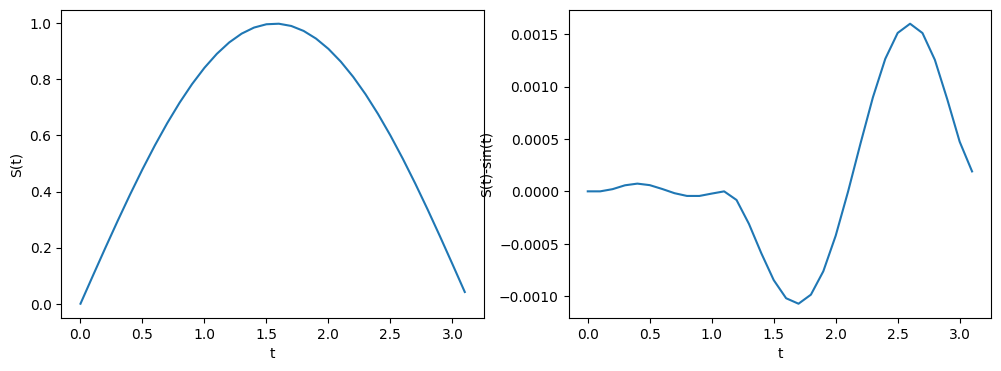

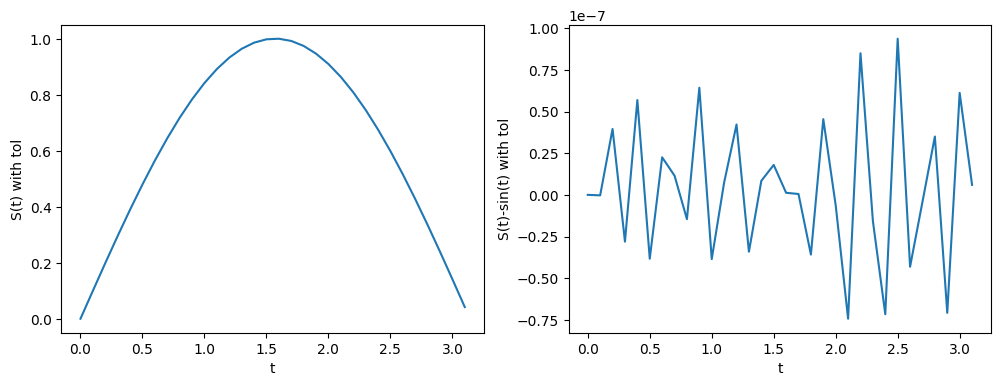

In [5]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.integrate import solve_ivp



F=lambda t, s: np.cos(t)
t_eval = np.arange(0, np.pi, 0.1)
sol = solve_ivp(F, [0, np.pi], [0], t_eval=t_eval)

plt.figure(figsize=(12,4))
plt.subplot(121)
plt.plot(sol.t, sol.y[0])
plt.xlabel('t')
plt.ylabel('S(t)')
plt.subplot(122)
plt.plot(sol.t, sol.y[0] - np.sin(sol.t))
plt.xlabel('t')
plt.ylabel('S(t)-sin(t)')
plt.show()

soltol = solve_ivp(F, [0, np.pi], [0], t_eval=t_eval, rtol = 1e-8, atol = 1e-8)
plt.figure(figsize=(12,4))
plt.subplot(121)
plt.plot(soltol.t, soltol.y[0])
plt.xlabel('t')
plt.ylabel('S(t) with tol')
plt.subplot(122)
plt.plot(soltol.t, soltol.y[0] - np.sin(soltol.t))
plt.xlabel('t')
plt.ylabel('S(t)-sin(t) with tol')
plt.show()

Example:
Let $S(t) = \begin {bmatrix} x(t) \\ y(t) \end{bmatrix}$
and $\frac {dS(t)}{dt} = \begin{bmatrix} 0 & t^2 \\ -t & 0 \end{bmatrix} S(t)$. The below example will solve this over the time interval [0, 10] with an initial value of $S_0 = \begin{bmatrix} 1 \\ 1 \end{bmatrix}$

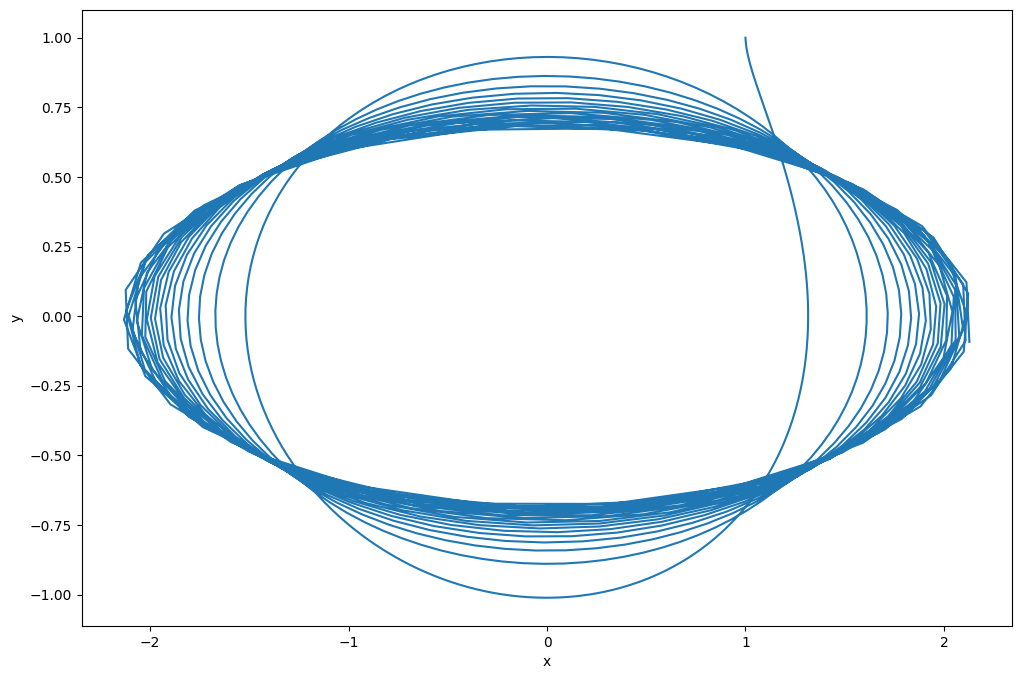

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

F = lambda t, s: np.dot(np.array([[0, t**2], [-t, 0]]), s)

t_eval = np.arange(0, 10.01, 0.01)
sol = solve_ivp(F, [0, 10], [1, 1], t_eval=t_eval)

plt.figure(figsize=(12,8))
plt.plot(sol.y.T[:,0], sol.y.T[:, 1])
plt.xlabel('x')
plt.ylabel('y')
plt.show()